# 미세먼지 농도 상승의 상관관계 분석

### 서울특별시의 연도별 및 시간대별 미세먼지 데이터를 활용한 환경오염 원인 분석 

 * 가설1 연도별로 미세먼지 농도는 꾸준히 높아졌을것이다.
 * 가설2 봄에 미세먼지 농도가 가장이다.높을것
 * 가설3 자동차 교통량이 많아지는 시간대에 미가 상승농상것이다갈이다.
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager,rc
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False 

In [2]:
df = pd.read_csv('서울시 대기질 자료 제공_2008-2011.csv',encoding='cp949')
df

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2011-12-31 23:00,평균,89.0,61.0
1,2011-12-31 23:00,강남구,91.0,58.0
2,2011-12-31 23:00,강동구,89.0,59.0
3,2011-12-31 23:00,강북구,68.0,49.0
4,2011-12-31 23:00,강서구,79.0,69.0
...,...,...,...,...
902525,2008-01-01 1:00,용산구,75.0,18.0
902526,2008-01-01 1:00,은평구,67.0,19.0
902527,2008-01-01 1:00,종로구,56.0,11.0
902528,2008-01-01 1:00,중구,58.0,11.0


In [3]:
df.shape # 90만개에 달하는 행이 있기때문에 사용할 데이터 행을 새로운 데이터프레임으로 구성하는 작업 필요.

(902530, 4)

In [4]:
df.info() #  미세먼지(PM10)열과 초미세먼지(PM25)열의 결측치가 보임.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902530 entries, 0 to 902529
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           902530 non-null  object 
 1   구분           902530 non-null  object 
 2   미세먼지(PM10)   879560 non-null  float64
 3   초미세먼지(PM25)  894380 non-null  float64
dtypes: float64(2), object(2)
memory usage: 27.5+ MB


In [5]:
df.dropna(inplace=True) # 분석을 할 데이터가 충분히 많다고 판단되어 결측치 삭제 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 875009 entries, 0 to 902529
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           875009 non-null  object 
 1   구분           875009 non-null  object 
 2   미세먼지(PM10)   875009 non-null  float64
 3   초미세먼지(PM25)  875009 non-null  float64
dtypes: float64(2), object(2)
memory usage: 33.4+ MB


In [6]:
df2 = pd.read_csv('서울시 대기질 자료 제공_2012-2015.csv',encoding='cp949')
df2
df2.info()
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907341 entries, 0 to 907340
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           907341 non-null  object 
 1   구분           907341 non-null  object 
 2   미세먼지(PM10)   890533 non-null  float64
 3   초미세먼지(PM25)  885874 non-null  float64
dtypes: float64(2), object(2)
memory usage: 27.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 874487 entries, 0 to 907340
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           874487 non-null  object 
 1   구분           874487 non-null  object 
 2   미세먼지(PM10)   874487 non-null  float64
 3   초미세먼지(PM25)  874487 non-null  float64
dtypes: float64(2), object(2)
memory usage: 33.4+ MB


In [7]:
df3 = pd.read_csv('서울시 대기질 자료 제공_2016-2019.csv',encoding='cp949')
df3
df3.info()
df3.dropna(inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911540 entries, 0 to 911539
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           911540 non-null  object 
 1   구분           911540 non-null  object 
 2   미세먼지(PM10)   880427 non-null  float64
 3   초미세먼지(PM25)  883045 non-null  float64
dtypes: float64(2), object(2)
memory usage: 27.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 870970 entries, 0 to 911539
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           870970 non-null  object 
 1   구분           870970 non-null  object 
 2   미세먼지(PM10)   870970 non-null  float64
 3   초미세먼지(PM25)  870970 non-null  float64
dtypes: float64(2), object(2)
memory usage: 33.2+ MB


In [8]:
df4 = pd.read_csv('서울시 대기질 자료 제공_2020-2021.csv',encoding='cp949')
df4.info()
df4.dropna(inplace=True)
df4.info()
df4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456142 entries, 0 to 456141
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           456142 non-null  object 
 1   구분           456142 non-null  object 
 2   미세먼지(PM10)   446550 non-null  float64
 3   초미세먼지(PM25)  448831 non-null  float64
dtypes: float64(2), object(2)
memory usage: 13.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 444383 entries, 0 to 456141
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   일시           444383 non-null  object 
 1   구분           444383 non-null  object 
 2   미세먼지(PM10)   444383 non-null  float64
 3   초미세먼지(PM25)  444383 non-null  float64
dtypes: float64(2), object(2)
memory usage: 17.0+ MB


,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2021-12-31 23:00,평균,21.0,9.0
1,2021-12-31 23:00,강남구,21.0,9.0
2,2021-12-31 23:00,강동구,25.0,7.0
3,2021-12-31 23:00,강북구,23.0,12.0
4,2021-12-31 23:00,강서구,28.0,9.0
...,...,...,...,...
456137,2020-01-01 0:00,용산구,12.0,13.0
456138,2020-01-01 0:00,은평구,18.0,12.0
456139,2020-01-01 0:00,종로구,20.0,15.0
456140,2020-01-01 0:00,중구,22.0,18.0


In [9]:
df5 = pd.read_csv('서울시 대기질 자료 제공_2022.csv',encoding='cp949')
df5.info()
df5.dropna(inplace=True)
df5.info()
df5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227760 entries, 0 to 227759
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일시            227760 non-null  object 
 1   구분            227760 non-null  object 
 2   미세먼지(PM10)    222844 non-null  float64
 3   초미세먼지(PM2.5)  223513 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 221737 entries, 0 to 227759
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일시            221737 non-null  object 
 1   구분            221737 non-null  object 
 2   미세먼지(PM10)    221737 non-null  float64
 3   초미세먼지(PM2.5)  221737 non-null  float64
dtypes: float64(2), object(2)
memory usage: 8.5+ MB


,일시,구분,미세먼지(PM10),초미세먼지(PM2.5)
0,2022-12-31 23:00,평균,59.0,46.0
1,2022-12-31 23:00,강남구,57.0,44.0
2,2022-12-31 23:00,강동구,68.0,55.0
3,2022-12-31 23:00,강북구,59.0,42.0
4,2022-12-31 23:00,강서구,62.0,40.0
...,...,...,...,...
227755,2022-01-01 0:00,용산구,22.0,11.0
227756,2022-01-01 0:00,은평구,19.0,9.0
227757,2022-01-01 0:00,종로구,20.0,9.0
227758,2022-01-01 0:00,중구,20.0,11.0


In [10]:
df['일시'] = pd.to_datetime(df['일시'])   # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경
df2['일시'] = pd.to_datetime(df2['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경
df3['일시'] = pd.to_datetime(df3['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경
df4['일시'] = pd.to_datetime(df4['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경
df5['일시'] = pd.to_datetime(df5['일시']) # 연도별 데이터를 뽑아내기위해 object 타입인 '일시'열을 datetime64로 변경

In [11]:
df.info() # '일시' 열이 datetime64로 변경됨.

<class 'pandas.core.frame.DataFrame'>
Index: 875009 entries, 0 to 902529
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   일시           875009 non-null  datetime64[ns]
 1   구분           875009 non-null  object        
 2   미세먼지(PM10)   875009 non-null  float64       
 3   초미세먼지(PM25)  875009 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 33.4+ MB


#####  08년부터 22년까지의 데이터프레임을 만들고 똑같은 전처리 과정을 해줌.
***

# 연도별로 미세먼지 농도의 상승폭을 확인하기위해 연도별 테이블 생성 
* 08년 부터 22년 까지의 데이터를 가지고있으니 3년주기로 08년 11년 14년 17년 20년 마지막 22년까지 총 6개의테이블을 생성

In [12]:
df2008 = df[df['일시'].dt.year==2008] # df에서 2008년인 행만 추출하여 df2008 데이터프레임 생성
df2008

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
676287,2008-12-31 23:00:00,평균,40.0,16.0
676288,2008-12-31 23:00:00,강남구,38.0,11.0
676289,2008-12-31 23:00:00,강동구,41.0,14.0
676290,2008-12-31 23:00:00,강북구,53.0,12.0
676291,2008-12-31 23:00:00,강서구,40.0,15.0
...,...,...,...,...
902525,2008-01-01 01:00:00,용산구,75.0,18.0
902526,2008-01-01 01:00:00,은평구,67.0,19.0
902527,2008-01-01 01:00:00,종로구,56.0,11.0
902528,2008-01-01 01:00:00,중구,58.0,11.0


In [13]:
df2008['연도'] = df2008['일시'].dt.year # '일시'열의 year만 추출해 새로운 열 생성
df2008['월'] = df2008['일시'].dt.month # '일시'열의 month만 추출해 새로운 열 생성 
df2008

C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\330598846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2008['연도'] = df2008['일시'].dt.year # '일시'열의 year만 추출해 새로운 열 생성
C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\330598846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2008['월'] = df2008['일시'].dt.month # '일시'열의 month만 추출해 새로운 열 생성


,일시,구분,미세먼지(PM10),초미세먼지(PM25),연도,월
676287,2008-12-31 23:00:00,평균,40.0,16.0,2008,12
676288,2008-12-31 23:00:00,강남구,38.0,11.0,2008,12
676289,2008-12-31 23:00:00,강동구,41.0,14.0,2008,12
676290,2008-12-31 23:00:00,강북구,53.0,12.0,2008,12
676291,2008-12-31 23:00:00,강서구,40.0,15.0,2008,12
...,...,...,...,...,...,...
902525,2008-01-01 01:00:00,용산구,75.0,18.0,2008,1
902526,2008-01-01 01:00:00,은평구,67.0,19.0,2008,1
902527,2008-01-01 01:00:00,종로구,56.0,11.0,2008,1
902528,2008-01-01 01:00:00,중구,58.0,11.0,2008,1


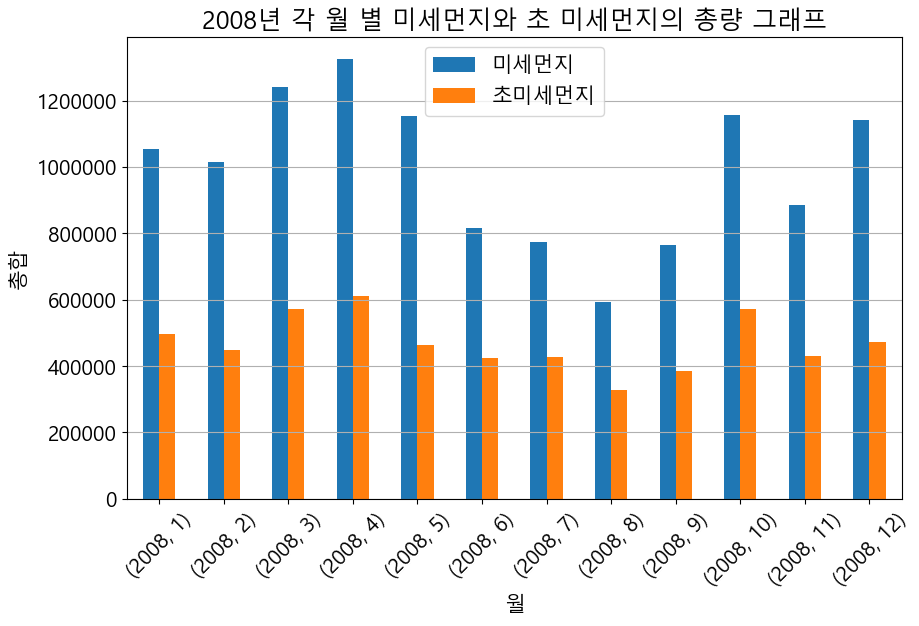

In [14]:
# 한 연도의 모든 일수와 모든 시간대의 총량을 더하는 과정 
monthly_data = df2008.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2008년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\2596519692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2011['연도'] = df2011['일시'].dt.year
C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\2596519692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2011['월'] = df2011['일시'].dt.month


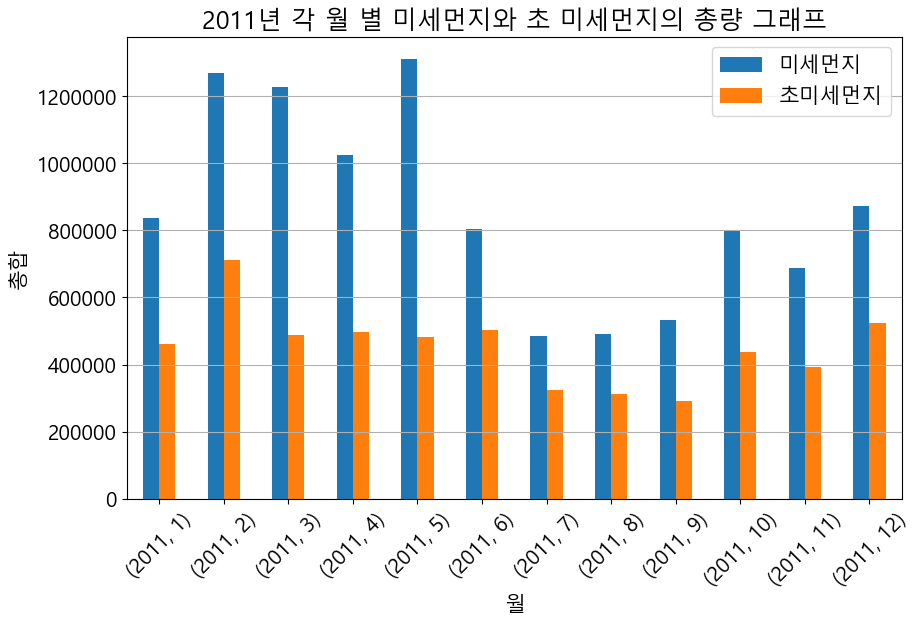

C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\2596519692.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['연도'] = df2014['일시'].dt.year
C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\2596519692.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2014['월'] = df2014['일시'].dt.month


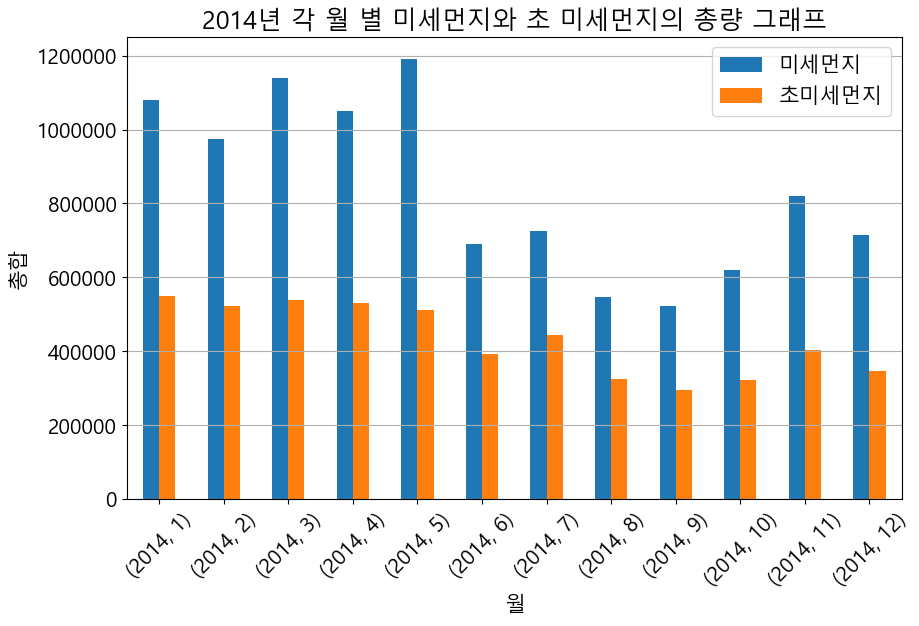

C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\2596519692.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017['연도'] = df2017['일시'].dt.year
C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\2596519692.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2017['월'] = df2017['일시'].dt.month


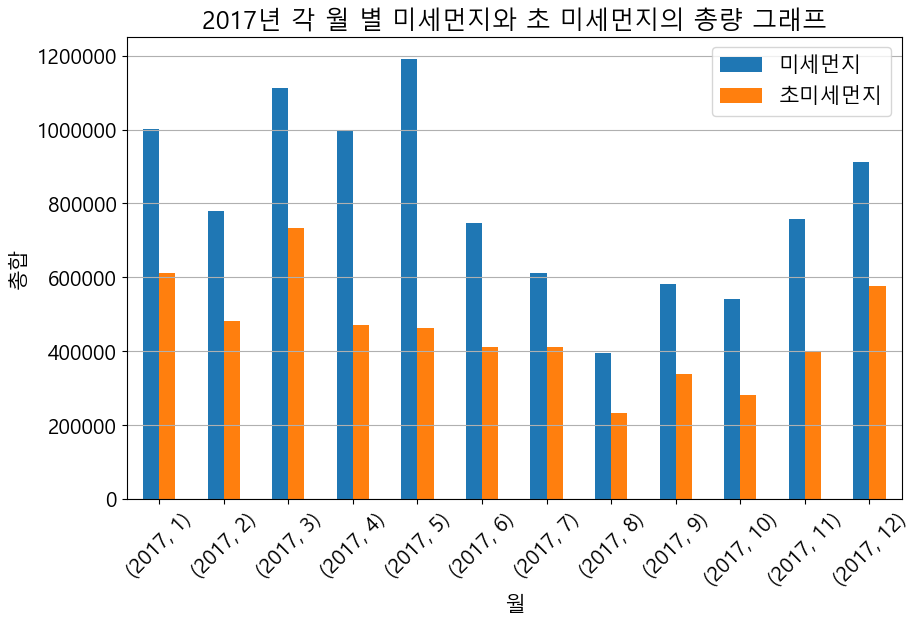

In [15]:
df2011 = df[df['일시'].dt.year==2011] 
df2011
df2011['연도'] = df2011['일시'].dt.year 
df2011['월'] = df2011['일시'].dt.month 
df
#연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2011.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2011년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()
#####################################################################################################################################


df2014 = df2[df2['일시'].dt.year==2014] 
df2014
df2014['연도'] = df2014['일시'].dt.year 
df2014['월'] = df2014['일시'].dt.month 
df2014
#연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2014.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2014년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()
#####################################################################################################################################


df2017 = df3[df3['일시'].dt.year==2017] 
df2017['연도'] = df2017['일시'].dt.year 
df2017['월'] = df2017['일시'].dt.month 
#연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2017.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2017년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()
#######################################################################################################################################




C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\2189601059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['연도'] = df2020['일시'].dt.year
C:\Users\EZEN\AppData\Local\Temp\ipykernel_5128\2189601059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2020['월'] = df2020['일시'].dt.month


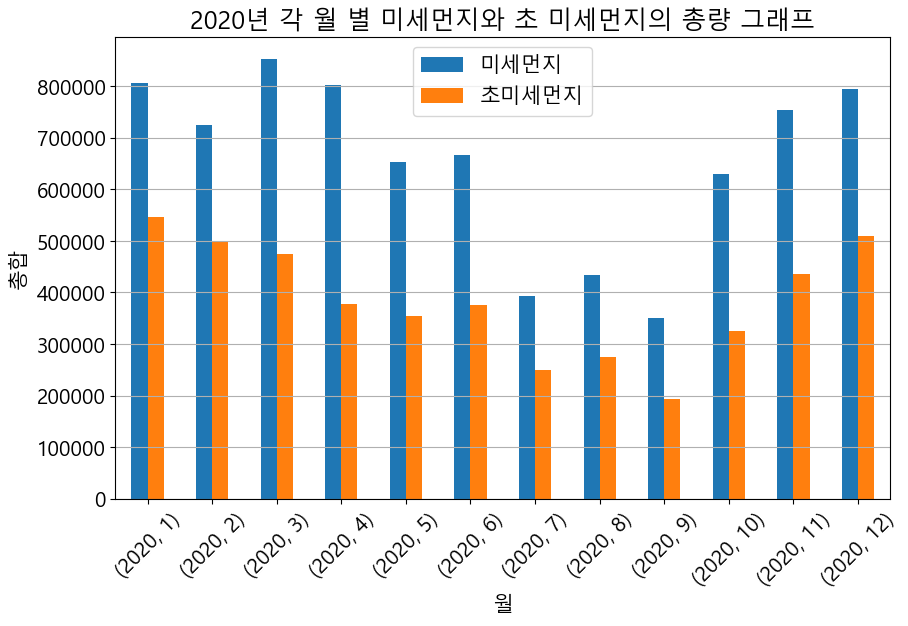

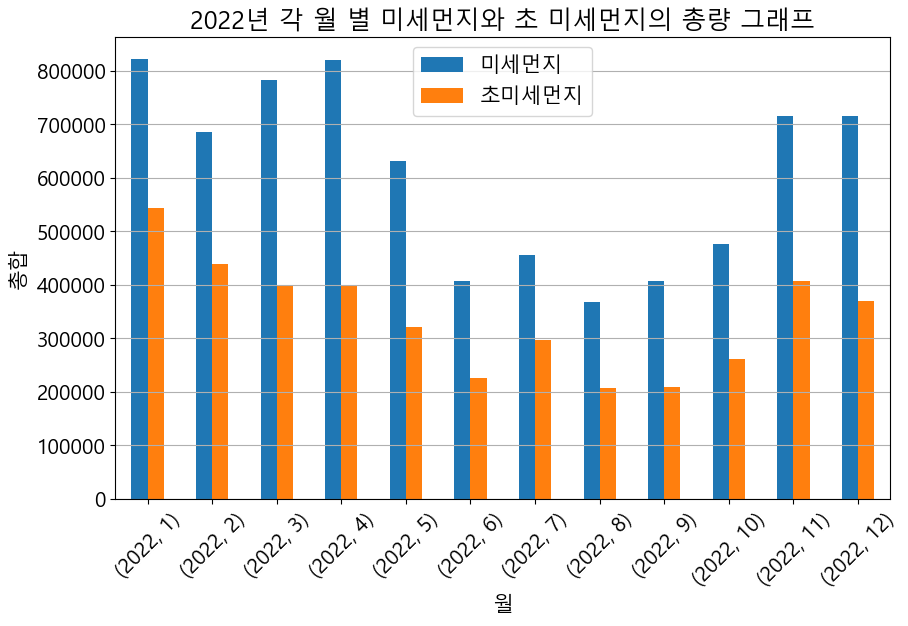

In [16]:
df2020 = df4[df4['일시'].dt.year==2020] 
df2020['연도'] = df2020['일시'].dt.year 
df2020['월'] = df2020['일시'].dt.month 
#연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2020.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM25)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2020년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()
#######################################################################################################################################


df2022 = df5[df5['일시'].dt.year==2022] 
df2022
df2022['연도'] = df2022['일시'].dt.year 
df2022['월'] = df2022['일시'].dt.month
df2022
#연도와 월을 기준으로 그룹화하여 미세먼지와 초미세먼지의 총량 계산
monthly_data = df2022.groupby(['연도', '월']).agg({'미세먼지(PM10)': 'sum', '초미세먼지(PM2.5)': 'sum'})

# 막대 그래프 그리기
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('2022년 각 월 별 미세먼지와 초 미세먼지의 총량 그래프')
plt.xlabel('월')
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.legend(['미세먼지', '초미세먼지'])
plt.grid(axis='y')

formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### 그래프를 분석한 결과, 예상대로 3월부터 5월 사이에 미세먼지 농도가높은경향이었으며, 이는 일반적인 봄철 미세먼지 농도 증가 현상과 일치한다.
###  또한 특이한 점으로는 2008년부터 2017년까지의 미세먼지 총합이 120만을 넘어선 반면, 2020년과 2022년에는 80만으로 낮아진 것을 확인 할수있다.
### 이 결과를 토대로 연도별 미세먼지 농도가 증가했을거라는 가설이 참이라고 볼수없는 가능성이 생김 
### 따라서 이를 검증하기 위해 각 연도별 데이터 간의 개수가 유의미하게 차이가나는지 검증하는 과정이 필요..

In [17]:
df2011.count() # 120만

일시             219764
구분             219764
미세먼지(PM10)     219764
초미세먼지(PM25)    219764
연도             219764
월              219764
dtype: int64

In [18]:
df2014.count() # 120만

일시             217199
구분             217199
미세먼지(PM10)     217199
초미세먼지(PM25)    217199
연도             217199
월              217199
dtype: int64

In [19]:
df2022.count() # 80만

일시              221737
구분              221737
미세먼지(PM10)      221737
초미세먼지(PM2.5)    221737
연도              221737
월               221737
dtype: int64

### 분석 결과, 2011년과 2014년의 미세먼지 최고치가 120만을 기록했던 데이터와 
### 2022년의 80만을 기록한 데이터 간의 개수 차이는 유의미하지 않았음.
### 그 원인을 파악해보자면 2020년과 2022년이 총량이 크게줄어든이유는 코로나의 영향이 컸을것으로보임.
### 이를 통해, 미세먼지 농도가 줄어든건 확인했지만
### 가설1인 "연도별로 미세먼지 농도가 꾸준히 높아졌을 것"이라는 가정은 불확실하기때문에 추가검증필요함.(추가검증은 밑에서)
### 다른 한편으로, 모든 그래프에서 3월부터 5월 사이에 높은 미세먼지 농도가 관찰됨. 
### 이는 가설2인 "봄에 미세먼지 농도가 가장 높을 것"을 확인하는 결과와 부합.
---

# 교통량 증가에 따른 미세먼지 농도변화 검증
+ 앞에서 확인해본 결과를 바탕으로 미세먼지가 가장많이 측정되는 달인 5월의 중간날인 15일을 임의로설정
 + 2014년 2017년 2개의 데이터를 선정 
 + 공공데이터포털에서 고속도로 노선별 시간대별 교통량 데이터 2014년,2017년 데이터 선정

In [20]:
tf2014 = pd.read_csv('서울도시고속도로 노선별 시간대별 교통량(2014).csv',encoding='cp949')
tf2014

,노선,시간대,교통량,구분,Unnamed: 4
0,내부순환로,0,4671,평일,NaN
1,내부순환로,1,3408,평일,NaN
2,내부순환로,2,2600,평일,NaN
3,내부순환로,3,2226,평일,NaN
4,내부순환로,4,2505,평일,NaN
...,...,...,...,...,...
571,서부간선도로,19,5366,휴일,NaN
572,서부간선도로,20,5448,휴일,NaN
573,서부간선도로,21,5403,휴일,NaN
574,서부간선도로,22,5235,휴일,NaN


In [21]:
tf2014.shape

(576, 5)

In [22]:
tf2014.info() # 아무데이터가 없는 열 발견

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   노선          576 non-null    object 
 1   시간대         576 non-null    int64  
 2   교통량         576 non-null    int64  
 3   구분          576 non-null    object 
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.6+ KB


In [23]:
tf2014.drop(columns=['Unnamed: 4'], inplace=True) # 데이터가 없는 열 삭제
tf2014

,노선,시간대,교통량,구분
0,내부순환로,0,4671,평일
1,내부순환로,1,3408,평일
2,내부순환로,2,2600,평일
3,내부순환로,3,2226,평일
4,내부순환로,4,2505,평일
...,...,...,...,...
571,서부간선도로,19,5366,휴일
572,서부간선도로,20,5448,휴일
573,서부간선도로,21,5403,휴일
574,서부간선도로,22,5235,휴일


In [24]:
tf2014['노선'].unique()

array(['내부순환로', '강변북로', '북부간선도로', '올림픽대로', '동부간선도로', '분당수서로', '경부고속도로',
       '서부간선도로'], dtype=object)

+ 내부순환로 => 성동구
+ 강변북로 =>   마포구
+ 북부간선도로 => 성북구
+ 올림픽대로 => 강서구
+ 동부간선도로 => 송파구
+ 경부고속도로 => 서초구
+ 서부간선도로 => 금천구
#### 각 노선별을 중심으로 지나가는 서울의 지역구들을 선정

In [25]:
tf2017 = pd.read_csv('서울도시고속도로 노선별 시간대별 교통량(2017).csv',encoding='cp949')
tf2017 # 2017년 교통량 데이터프레임 생성 (이건 결측치에 오류가없었음)

,노선,시간대,교통량,구분
0,내부순환로,0,4455,평일
1,내부순환로,1,3328,평일
2,내부순환로,2,2668,평일
3,내부순환로,3,2440,평일
4,내부순환로,4,3030,평일
...,...,...,...,...
643,강남순환로,19,5206,휴일
644,강남순환로,20,4746,휴일
645,강남순환로,21,4407,휴일
646,강남순환로,22,3595,휴일


### 교통량이 가장 적은 시간대와 가장 높은 시간대를 찾아보자.

In [26]:
tf2014_weekday = tf2014[tf2014['구분'] == '평일'] 
tf2014_weekday

,노선,시간대,교통량,구분
0,내부순환로,0,4671,평일
1,내부순환로,1,3408,평일
2,내부순환로,2,2600,평일
3,내부순환로,3,2226,평일
4,내부순환로,4,2505,평일
...,...,...,...,...
187,서부간선도로,19,5232,평일
188,서부간선도로,20,5536,평일
189,서부간선도로,21,5755,평일
190,서부간선도로,22,5617,평일


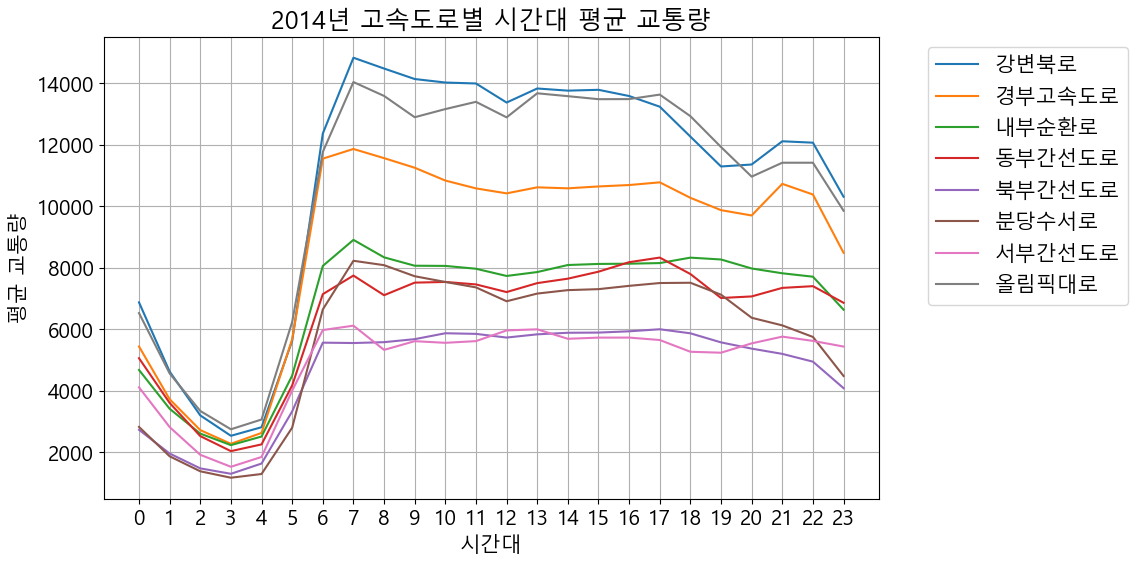

In [27]:
import matplotlib.pyplot as plt

# 노선별 시간대 평균 교통량 계산
grouped = tf2014_weekday.groupby(['노선', '시간대'])['교통량'].mean().reset_index()
plt.figure(figsize=(10, 6))
# 고속도로별 그래프 그리기
for highway in grouped['노선'].unique():
    data = grouped[grouped['노선'] == highway]
    plt.plot(data['시간대'], data['교통량'], label=highway)

# 그래프 스타일과 범례 설정

plt.xlabel('시간대')
plt.ylabel('평균 교통량')
plt.title('2014년 고속도로별 시간대 평균 교통량')
plt.xticks(range(24))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [28]:
tf2014_3 = tf2014[tf2014['시간대'] == 3] # 교통량이 가장적은시간대인 3시로선
tf2014_3

,노선,시간대,교통량,구분
3,내부순환로,3,2226,평일
27,강변북로,3,2529,평일
51,북부간선도로,3,1293,평일
75,올림픽대로,3,2741,평일
99,동부간선도로,3,2030,평일
123,분당수서로,3,1165,평일
147,경부고속도로,3,2268,평일
171,서부간선도로,3,1521,평일
195,내부순환로,3,3260,주말
219,강변북로,3,4348,주말


In [29]:
tf2014_7 = tf2014[tf2014['시간대'] == 7] # 교통량이가장높은 오전7시로 선정
tf2014_7

,노선,시간대,교통량,구분
7,내부순환로,7,8903,평일
31,강변북로,7,14829,평일
55,북부간선도로,7,5547,평일
79,올림픽대로,7,14038,평일
103,동부간선도로,7,7742,평일
127,분당수서로,7,8223,평일
151,경부고속도로,7,11860,평일
175,서부간선도로,7,6112,평일
199,내부순환로,7,6825,주말
223,강변북로,7,10541,주말


In [30]:
tf2014_3_weekday = tf2014_3[tf2014_3['구분'] == '평일'] 
tf2014_3_weekday

,노선,시간대,교통량,구분
3,내부순환로,3,2226,평일
27,강변북로,3,2529,평일
51,북부간선도로,3,1293,평일
75,올림픽대로,3,2741,평일
99,동부간선도로,3,2030,평일
123,분당수서로,3,1165,평일
147,경부고속도로,3,2268,평일
171,서부간선도로,3,1521,평일


In [31]:
tf2014_7_weekday = tf2014_7[tf2014_7['구분'] == '평일']
tf2014_7_weekday

,노선,시간대,교통량,구분
7,내부순환로,7,8903,평일
31,강변북로,7,14829,평일
55,북부간선도로,7,5547,평일
79,올림픽대로,7,14038,평일
103,동부간선도로,7,7742,평일
127,분당수서로,7,8223,평일
151,경부고속도로,7,11860,평일
175,서부간선도로,7,6112,평일


In [32]:
pip install folium 

Note: you may need to restart the kernel to use updated packages.


In [33]:
import folium
from folium.plugins import MarkerCluster
from datetime import datetime, time

In [34]:
seoul_traffic_coordinates = {       # 
  
    '내부순환로': [37.5509, 127.0403], # 성동구
    '강변북로': [37.5639, 126.9087], # 마포구
    '북부간선도로': [37.5891, 127.0182], # 성북구
    '올림픽대로': [37.5510, 126.8495], # 강서구 
    '동부간선도로': [37.5145, 127.1077], # 송파구
    '경부고속도로': [37.4837, 127.0324], # 서초구
    '서부간선도로': [37.4601, 126.9000], # 금천구 
  
}

seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)  # 서울 중심부 좌표

# 마커 클러스터 객체 생성
marker_cluster = MarkerCluster().add_to(seoul_map)

# # 시간대가 평일 12시인 데이터 필터링
# tf2014_to_work_weekday = tf2014_to_work[tf2014_12['구분'] == '평일']

# 각 도로별로 반복하면서 CircleMarker 생성하여 클러스터에 추가
for route in tf2014_3_weekday['노선'].unique():
    # 노선별 위치 정보 가져오기
    latitude, longitude = seoul_traffic_coordinates.get(route, [0, 0])  # 해당하는 노선 정보가 없으면 [0, 0] 반환
    
    # 해당 도로의 데이터 추출
    route_data = tf2014_3_weekday[tf2014_3_weekday['노선'] == route]
    
    # 교통량에 따라 원의 색상 결정
    traffic_color = 'green'  # 교통량이 적을 때 초록색으로 설정
    if route_data['교통량'].mean() > 10000:  # 교통량 평균이 10000 이상이면 빨간색으로 설정
        traffic_color = 'red'
    elif route_data['교통량'].mean() > 5000:  # 교통량 평균이 5000 이상이면 주황색으로 설정
        traffic_color = 'orange'
    
    # CircleMarker 생성
    folium.CircleMarker(location=[latitude, longitude],
                        radius=route_data['교통량'].mean() / 200,  # 원의 크기는 교통량에 비례하도록 조정
                        color=traffic_color,
                        fill=True,
                        fill_color=traffic_color,
                        fill_opacity=0.7,
                        tooltip=f"{route}<br>교통량: {int(route_data['교통량'].mean())}"
                        ).add_to(marker_cluster)

    # 고속도로명과 교통량을 마커에 표시될 HTML 코드 작성
    icon_html = f"<div style='display:flex; flex-direction:column; align-items:center; justify-content:center; font-size:10pt; text-align:center; font-weight:bold;'>{route}<br>{int(route_data['교통량'].mean())}</div>"
    
    # 마커 생성하여 지도에 추가
    folium.Marker(location=[latitude, longitude],
                  icon=folium.DivIcon(html=icon_html)).add_to(seoul_map)

# 지도 출력
seoul_map


In [35]:
seoul_traffic_coordinates = {       # 
  
    '내부순환로': [37.5509, 127.0403], # 성동구
    '강변북로': [37.5639, 126.9087], # 마포구
    '북부간선도로': [37.5891, 127.0182], # 성북구
    '올림픽대로': [37.5510, 126.8495], # 강서구 
    '동부간선도로': [37.5145, 127.1077], # 송파구
    '경부고속도로': [37.4837, 127.0324], # 서초구
    '서부간선도로': [37.4601, 126.9000], # 금천구 
  
}

seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)  # 서울 중심부 좌표

# 마커 클러스터 객체 생성
marker_cluster = MarkerCluster().add_to(seoul_map)

# 각 도로별로 반복하면서 CircleMarker 생성하여 클러스터에 추가
for route in tf2014_7_weekday['노선'].unique():
    # 노선별 위치 정보 가져오기
    latitude, longitude = seoul_traffic_coordinates.get(route, [0, 0])  # 해당하는 노선 정보가 없으면 [0, 0] 반환
    
    # 해당 도로의 데이터 추출
    route_data = tf2014_7_weekday[tf2014_7_weekday['노선'] == route]
    
    # 교통량에 따라 원의 색상 결정
    traffic_color = 'green'  # 교통량이 적을 때 초록색으로 설정
    if route_data['교통량'].mean() > 10000:  # 교통량 평균이 10000 이상이면 빨간색으로 설정
        traffic_color = 'red'
    elif route_data['교통량'].mean() > 5000:  # 교통량 평균이 5000 이상이면 주황색으로 설정
        traffic_color = 'orange'
    
    # CircleMarker 생성
    folium.CircleMarker(location=[latitude, longitude],
                        radius=route_data['교통량'].mean() / 200,  # 원의 크기는 교통량에 비례하도록 조정
                        color=traffic_color,
                        fill=True,
                        fill_color=traffic_color,
                        fill_opacity=0.7,
                        tooltip=f"{route}<br>교통량: {int(route_data['교통량'].mean())}"
                        ).add_to(marker_cluster)

    # 고속도로명과 교통량을 마커에 표시될 HTML 코드 작성
    icon_html = f"<div style='display:flex; flex-direction:column; align-items:center; justify-content:center; font-size:10pt; text-align:center; font-weight:bold;'>{route}<br>{int(route_data['교통량'].mean())}</div>"
    
    # 마커 생성하여 지도에 추가
    folium.Marker(location=[latitude, longitude],
                  icon=folium.DivIcon(html=icon_html)).add_to(seoul_map)

# 지도 출력
seoul_map


### 각 지역구별 특정 날짜 특정 시간대에 클러스터 시각화를 위해 데이터 필터링

In [36]:
# from datetime import datetime, time

desired_date = datetime(2008, 5, 15) # 날짜지정
desired_time = time(4, 0, 0)  # 교통량이 가장적은 오전3시의 1시간뒤인 4시로 시간지정
desired_data = df2008[(df2008['일시'].dt.date == desired_date.date()) & (df2008['일시'].dt.time == desired_time)]
desired_data

,일시,구분,미세먼지(PM10),초미세먼지(PM25),연도,월
820108,2008-05-15 04:00:00,평균,24.0,12.0,2008,5
820109,2008-05-15 04:00:00,강남구,23.0,9.0,2008,5
820110,2008-05-15 04:00:00,강동구,23.0,17.0,2008,5
820111,2008-05-15 04:00:00,강북구,20.0,8.0,2008,5
820112,2008-05-15 04:00:00,강서구,18.0,14.0,2008,5
820113,2008-05-15 04:00:00,관악구,28.0,21.0,2008,5
820114,2008-05-15 04:00:00,광진구,18.0,12.0,2008,5
820116,2008-05-15 04:00:00,금천구,35.0,10.0,2008,5
820117,2008-05-15 04:00:00,노원구,20.0,7.0,2008,5
820118,2008-05-15 04:00:00,도봉구,17.0,9.0,2008,5


In [37]:
import folium
from folium.plugins import MarkerCluster
from datetime import datetime, time

# 서울의 각 구의 중심 좌표
seoul_district_coordinates = {
    '마포구': [37.5639, 126.9087],
    '성동구': [37.5509, 127.0403], 
    '성북구': [37.5891, 127.0182],
    '강서구': [37.5510, 126.8495],
    '송파구': [37.5145, 127.1077],
    '서초구': [37.4837, 127.0324],
    '금천구': [37.4601, 126.9000],
  
}

# 원하는 날짜와 시간 설정
desired_date = datetime(2014, 5, 5) # 날짜지정
desired_time = time(4, 0, 0)  # 시간지정

# 해당 날짜와 시간에 해당하는 데이터 추출
desired_data = df2014[(df2014['일시'].dt.date == desired_date.date()) & (df2014['일시'].dt.time == desired_time)]

# 지도 객체 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)  # 서울 중심부 좌표

# 각 구의 미세먼지 농도에 따라 원과 텍스트 생성하여 지도에 추가
for idx, row in desired_data.iterrows():
    if row['구분'] != '평균':
        district = row['구분']
        pm10_value = row['미세먼지(PM10)']
        if district in seoul_district_coordinates:
            # 적절한 색상과 크기로 원을 그리기
            if pm10_value <= 30:  # 30이하면 좋음
                color = 'blue'
            elif pm10_value <= 80: # 30이상 80이하면 보통
                color = 'green'
            elif pm10_value <= 150: # 80이상 150 이하면 나쁨
                color = 'orange'
            else:
                color = 'red' # 150이상은 매우 나쁨
            folium.Circle(location=seoul_district_coordinates[district], radius=600,
                          color=color, fill=True, fill_color=color, fill_opacity=0.7).add_to(seoul_map)
            # 원 안에 구 이름과 미세먼지 수치를 표시
            icon_html = f"<div style='display:flex; flex-direction:column; align-items:center; justify-content:center; font-size:10pt; text-align:center; font-weight:bold;'>{district}<br>{pm10_value}</div>"
            folium.Marker(location=seoul_district_coordinates[district],
                          icon=folium.DivIcon(html=icon_html)).add_to(seoul_map)

# 지도 출력
seoul_map



In [38]:
import folium
from folium.plugins import MarkerCluster
from datetime import datetime, time

# 서울의 각 구의 중심 좌표
seoul_district_coordinates = {
    '마포구': [37.5639, 126.9087],
    '성동구': [37.5509, 127.0403], 
    '성북구': [37.5891, 127.0182],
    '강서구': [37.5510, 126.8495],
    '송파구': [37.5145, 127.1077],
    '서초구': [37.4837, 127.0324],
    '금천구': [37.4601, 126.9000],
  
}

# 원하는 날짜와 시간 설정
desired_date = datetime(2014, 5, 5) # 날짜지정
desired_time = time(7, 0, 0)  # 시간지정

# 해당 날짜와 시간에 해당하는 데이터 추출
desired_data = df2014[(df2014['일시'].dt.date == desired_date.date()) & (df2014['일시'].dt.time == desired_time)]

# 지도 객체 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)  # 서울 중심부 좌표

# 각 구의 미세먼지 농도에 따라 원과 텍스트 생성하여 지도에 추가
for idx, row in desired_data.iterrows():
    if row['구분'] != '평균':
        district = row['구분']
        pm10_value = row['미세먼지(PM10)']
        if district in seoul_district_coordinates:
            # 적절한 색상과 크기로 원을 그리기
            if pm10_value <= 30:  # 30이하면 좋음
                color = 'blue'
            elif pm10_value <= 80: # 30이상 80이하면 보통
                color = 'green'
            elif pm10_value <= 150: # 80이상 150 이하면 나쁨
                color = 'orange'
            else:
                color = 'red' # 150이상은 매우 나쁨
            folium.Circle(location=seoul_district_coordinates[district], radius=600,
                          color=color, fill=True, fill_color=color, fill_opacity=0.7).add_to(seoul_map)
            # 원 안에 구 이름과 미세먼지 수치를 표시
            icon_html = f"<div style='display:flex; flex-direction:column; align-items:center; justify-content:center; font-size:10pt; text-align:center; font-weight:bold;'>{district}<br>{pm10_value}</div>"
            folium.Marker(location=seoul_district_coordinates[district],
                          icon=folium.DivIcon(html=icon_html)).add_to(seoul_map)

# 지도 출력
seoul_map


### 3시와 7시의 교통량과 미세먼지 수치를 비교해보니 큰 상관관계는 발견하지못했음.
### 교통량이 미세먼지 농도와 큰 관련이 없을수도있다는 가능성 확인

***
# 연도별 미세먼지 상승에대한 추가 검증
#####  08년부터 22년까지의 데이터프레임을 모두 합치고 전처리 과정을 해줌.
***

In [39]:
df_concatenated = pd.concat([df, df2, df3, df4, df5]) 
#2008년부터 2022년까지 합치기
df_concatenated

,일시,구분,미세먼지(PM10),초미세먼지(PM25),초미세먼지(PM2.5)
0,2011-12-31 23:00:00,평균,89.0,61.0,NaN
1,2011-12-31 23:00:00,강남구,91.0,58.0,NaN
2,2011-12-31 23:00:00,강동구,89.0,59.0,NaN
3,2011-12-31 23:00:00,강북구,68.0,49.0,NaN
4,2011-12-31 23:00:00,강서구,79.0,69.0,NaN
...,...,...,...,...,...
227755,2022-01-01 00:00:00,용산구,22.0,NaN,11.0
227756,2022-01-01 00:00:00,은평구,19.0,NaN,9.0
227757,2022-01-01 00:00:00,종로구,20.0,NaN,9.0
227758,2022-01-01 00:00:00,중구,20.0,NaN,11.0


In [40]:
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3286586 entries, 0 to 227759
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   일시            datetime64[ns]
 1   구분            object        
 2   미세먼지(PM10)    float64       
 3   초미세먼지(PM25)   float64       
 4   초미세먼지(PM2.5)  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 150.4+ MB


In [41]:
df_concatenated.shape

(3286586, 5)

In [42]:
sorted_df = df_concatenated.sort_values(by='일시')
sorted_df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),초미세먼지(PM2.5)
902513,2008-01-01 01:00:00,노원구,37.0,18.0,NaN
902505,2008-01-01 01:00:00,평균,59.0,14.0,NaN
902506,2008-01-01 01:00:00,강동구,61.0,11.0,NaN
902507,2008-01-01 01:00:00,강북구,58.0,14.0,NaN
902508,2008-01-01 01:00:00,강서구,61.0,15.0,NaN
...,...,...,...,...,...
21,2022-12-31 23:00:00,용산구,54.0,NaN,41.0
22,2022-12-31 23:00:00,은평구,48.0,NaN,34.0
24,2022-12-31 23:00:00,중구,64.0,NaN,62.0
11,2022-12-31 23:00:00,동대문구,71.0,NaN,59.0


#####  csv에서 초미세먼지 column 명이 달라서 한곳으로 모으고 기존 열을 삭제함

In [43]:
# '초미세먼지(PM2.5)' 열의 NaN 값을 해당 행의 '초미세먼지(PM25)' 열의 값으로 채우기
sorted_df['초미세먼지'] = sorted_df['초미세먼지(PM2.5)'].fillna(sorted_df['초미세먼지(PM25)'])
sorted_df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),초미세먼지(PM2.5),초미세먼지
902513,2008-01-01 01:00:00,노원구,37.0,18.0,NaN,18.0
902505,2008-01-01 01:00:00,평균,59.0,14.0,NaN,14.0
902506,2008-01-01 01:00:00,강동구,61.0,11.0,NaN,11.0
902507,2008-01-01 01:00:00,강북구,58.0,14.0,NaN,14.0
902508,2008-01-01 01:00:00,강서구,61.0,15.0,NaN,15.0
...,...,...,...,...,...,...
21,2022-12-31 23:00:00,용산구,54.0,NaN,41.0,41.0
22,2022-12-31 23:00:00,은평구,48.0,NaN,34.0,34.0
24,2022-12-31 23:00:00,중구,64.0,NaN,62.0,62.0
11,2022-12-31 23:00:00,동대문구,71.0,NaN,59.0,59.0


In [44]:
sorted_df.drop(columns=['초미세먼지(PM2.5)'], inplace=True)
sorted_df.drop(columns=['초미세먼지(PM25)'], inplace=True)

In [45]:
sorted_df

,일시,구분,미세먼지(PM10),초미세먼지
902513,2008-01-01 01:00:00,노원구,37.0,18.0
902505,2008-01-01 01:00:00,평균,59.0,14.0
902506,2008-01-01 01:00:00,강동구,61.0,11.0
902507,2008-01-01 01:00:00,강북구,58.0,14.0
902508,2008-01-01 01:00:00,강서구,61.0,15.0
...,...,...,...,...
21,2022-12-31 23:00:00,용산구,54.0,41.0
22,2022-12-31 23:00:00,은평구,48.0,34.0
24,2022-12-31 23:00:00,중구,64.0,62.0
11,2022-12-31 23:00:00,동대문구,71.0,59.0


In [46]:
sorted_df['구분'].unique()

array(['노원구', '평균', '강동구', '강북구', '강서구', '관악구', '구로구', '금천구', '도봉구',
       '동대문구', '마포구', '서대문구', '동작구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구', '서초구', '강남구', '광진구'],
      dtype=object)

In [47]:
filtered_df = sorted_df[sorted_df['구분'].str.contains('평균')]
filtered_df

,일시,구분,미세먼지(PM10),초미세먼지
902505,2008-01-01 01:00:00,평균,59.0,14.0
902480,2008-01-01 02:00:00,평균,52.0,14.0
902455,2008-01-01 03:00:00,평균,49.0,14.0
902430,2008-01-01 04:00:00,평균,45.0,15.0
902405,2008-01-01 05:00:00,평균,41.0,15.0
...,...,...,...,...
104,2022-12-31 19:00:00,평균,55.0,42.0
78,2022-12-31 20:00:00,평균,56.0,43.0
52,2022-12-31 21:00:00,평균,56.0,44.0
26,2022-12-31 22:00:00,평균,58.0,45.0


In [48]:
filtered_df.set_index('일시', inplace=True)
filtered_df

,구분,미세먼지(PM10),초미세먼지
일시,,,
2008-01-01 01:00:00,평균,59.0,14.0
2008-01-01 02:00:00,평균,52.0,14.0
2008-01-01 03:00:00,평균,49.0,14.0
2008-01-01 04:00:00,평균,45.0,15.0
2008-01-01 05:00:00,평균,41.0,15.0
...,...,...,...
2022-12-31 19:00:00,평균,55.0,42.0
2022-12-31 20:00:00,평균,56.0,43.0
2022-12-31 21:00:00,평균,56.0,44.0


In [49]:
three_hourly_avg = filtered_df.drop(columns=['구분']).resample('M').mean()
three_hourly_avg

,미세먼지(PM10),초미세먼지
일시,,
2008-01-31,60.911171,36.733513
2008-02-29,62.609195,27.833333
2008-03-31,70.224462,32.842742
2008-04-30,72.926389,34.063889
2008-05-31,60.973118,24.801075
...,...,...
2022-08-31,20.094086,11.372312
2022-09-30,22.247222,11.436111
2022-10-31,25.159946,13.837366


#### * 시간이 흐를수록 미세먼지가 증가할 것으로 예상한 가설 분석을 위한 그래프 작성


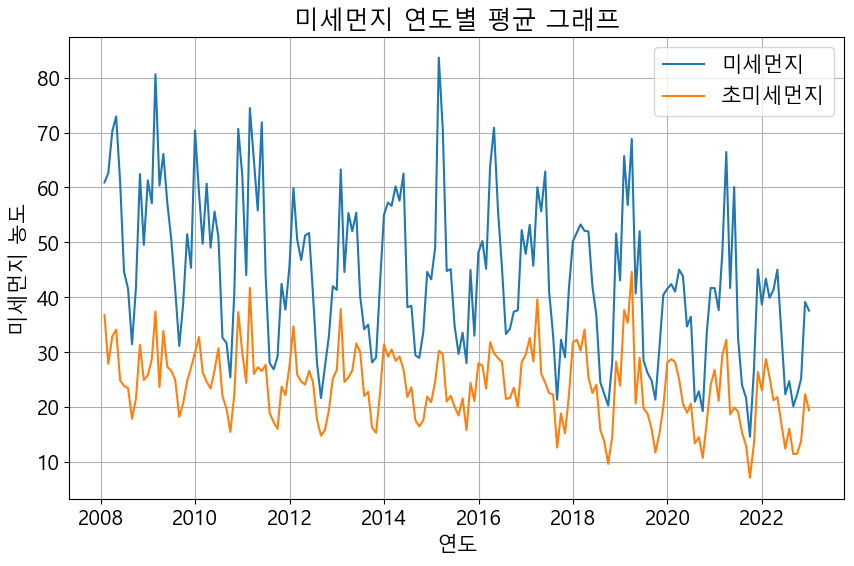

In [50]:
plt.figure(figsize=(10, 6))

# 미세먼지(PM10)에 대한 연도별 평균을 선 그래프로 표시합니다.
plt.plot(three_hourly_avg.index, three_hourly_avg['미세먼지(PM10)'], label='미세먼지')

# 초미세먼지에 대한 연도별 평균을 선 그래프로 표시합니다.
plt.plot(three_hourly_avg.index, three_hourly_avg['초미세먼지'], label='초미세먼지')

# 차트에 제목과 축 라벨을 추가합니다.
plt.title('미세먼지 연도별 평균 그래프')
plt.xlabel('연도')
plt.ylabel('미세먼지 농도')
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()

+  2008년부터 2022년 까지 연도별 미세먼지 평균 그래프를 확인하였으나 시간이 지날수록 증가하는 모습을 보이지 않음
+  각 연도별 측정 값을 매달 확인해 보기 위해 미세먼지 그래프를 작성

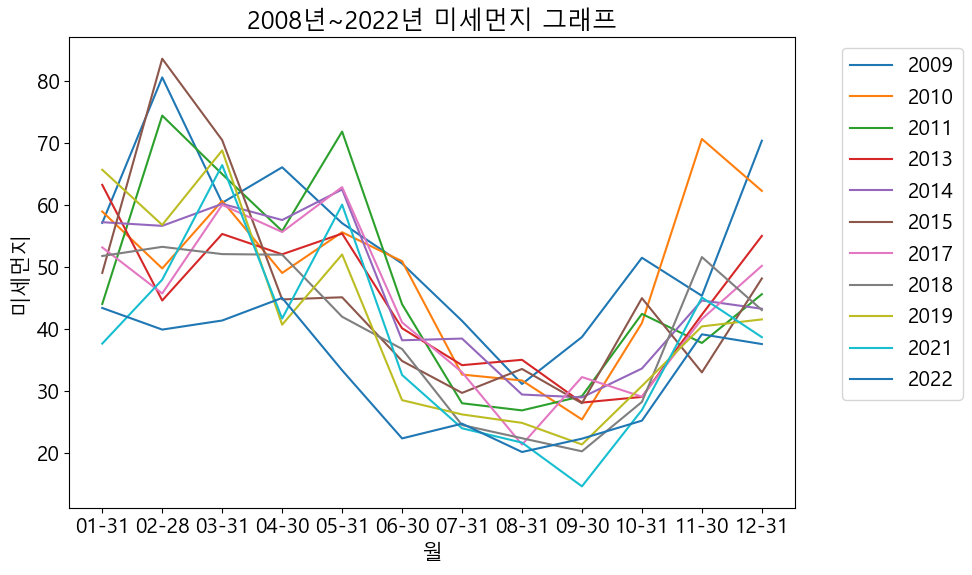

In [51]:
plt.figure(figsize=(10, 6))

# 2008년부터 2021년까지의 미세먼지(PM10) 데이터를 라인 플롯으로 중첩하여 그립니다.
for i in range(2008, 2023):
    if (i%4 != 0) and (i%3 == 2 or i%3 ==1 or i%3 ==0) :
        data = three_hourly_avg.loc[str(i)+'-01-31':str(i)+'-12-31', ['미세먼지(PM10)']]
        plt.plot(data.index.strftime('%m-%d'), data['미세먼지(PM10)'].values, label=str(i))
# for i in range(2008, 2013):
#     if i%4 != 0 :
#         data = three_hourly_avg.loc[str(i)+'-01-31':str(i)+'-12-31', ['미세먼지(PM10)']]
#         plt.plot(data.index.strftime('%m-%d'), data['미세먼지(PM10)'].values, label=str(i))

# 그래프에 제목을 추가합니다.
plt.title('2008년~2022년 미세먼지 그래프')

# x축과 y축에 라벨을 추가합니다.
plt.xlabel('월')
plt.ylabel('미세먼지')

# 범례를 추가합니다.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 # plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# 그래프를 표시합니다.
plt.tight_layout()
plt.show()

* 매달 평균값으로 데이터를 만들다보니 윤달처리를 못해 윤달을 제외하고 그래프를 작성함
* 그래프를 확인해보니 여름과 겨울의 차이가 확연하게 보여 새로운 가설을 제시
#### 가설 - 미세먼지의 측정값은 습도의 영향을 받을것으로 보인다.
![습도](습도.png)
* 확인 결과 대한민국 평균습도 그래프와 매우 유사한 모습을 보임
* 윤달 확인을 위한 그래프를 다시 작성

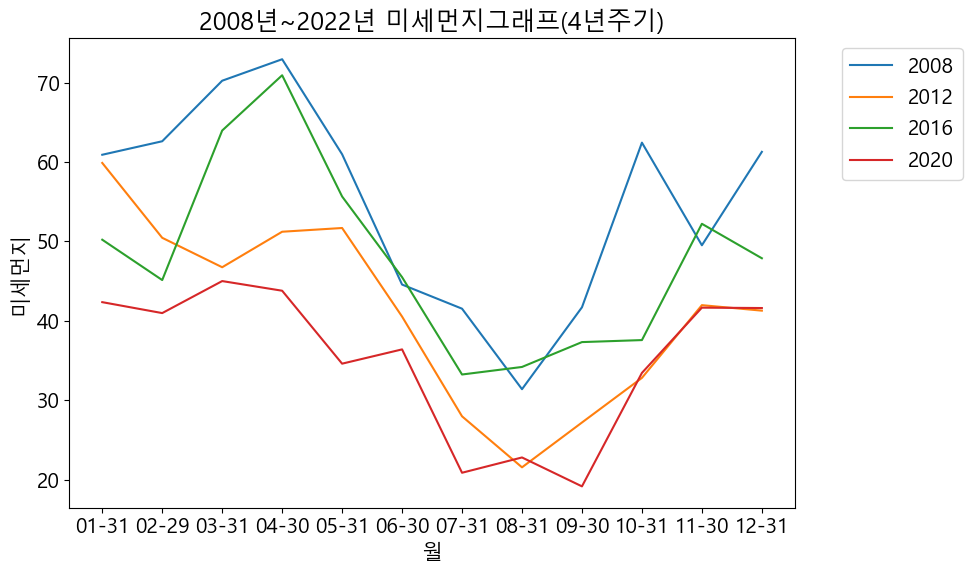

In [52]:
plt.figure(figsize=(10, 6))

# 2008년부터 2021년까지의 미세먼지(PM10) 데이터를 라인 플롯으로 중첩하여 그립니다.
for i in range(2008, 2023):
    if i%4 == 0 :
        data = three_hourly_avg.loc[str(i)+'-01-31':str(i)+'-12-31', ['미세먼지(PM10)']]
        plt.plot(data.index.strftime('%m-%d'), data['미세먼지(PM10)'].values, label=str(i))
# for i in range(2008, 2013):
#     if i%4 != 0 :
#         data = three_hourly_avg.loc[str(i)+'-01-31':str(i)+'-12-31', ['미세먼지(PM10)']]
#         plt.plot(data.index.strftime('%m-%d'), data['미세먼지(PM10)'].values, label=str(i))

# 그래프에 제목을 추가합니다.
plt.title('2008년~2022년 미세먼지그래프(윤달)')

# x축과 y축에 라벨을 추가합니다.
plt.xlabel('월')
plt.ylabel('미세먼지')

# 범례를 추가합니다.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 # plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# 그래프를 표시합니다.
plt.tight_layout()
plt.show()

* 윤달 그래프를 확인하니 위의 그래프와 비슷한 모습을 보임 가설 확인
* 그래프를 확인하던 중 4년에 한번씩 미세먼지의 평균값이 변하는것을 확인함
* 2008년 2016년은 높고 2012년 2020년은 낮은양을 보임
* 4년 주기의 기상변화를 검색하였고 엘리뇨와 라니냐를 발견함 주로 3~4년 주기로 발생한다는 것을 확인하여 새로운 가설 제시
### 가설 - 엘리뇨와 라니냐가 미세먼지의 수치에 영향을 미칠것으로 보여진다.

* 엘리뇨는 7- 8 강수량이 집중 9월 강수량이 감소하고 기온도 낮아지면 11,12 강수가 증가하고 평년보다 기온이 상승한다
라니냐는 지구 평균 온도를 0.2도 낮아지게 하여 평균온도 상승조차 막는다
* 라니냐때는 해수면의 온도가 평소보다 낮아지고 가을 가뭄을 유발하며 겨울에는 엄청난 추위를 유발할 수 있다.
9월 강수량이 많아지고 11월 12월 강수량이 감소한다.

![1](엘리뇨라니냐그래프.png)


![2](기상청정보.png)

* 라니냐가 발생했을때 윤달 미새먼지 평균 그래프가 더 높은 수치를 보이는것을 확인함
* 다만 위 가설은 샘플 수가 너무 적어 가설이 맞다고 보기는 어려움
* 예상하건데 라니냐일때 지구의 평균 기온이 낮고 평소보다 눈이 많이와서 보온을위한 가스, 석탄의 사용이 증가할 것이고 이로인해 미세먼지양이 증가하였을것으로 보여짐

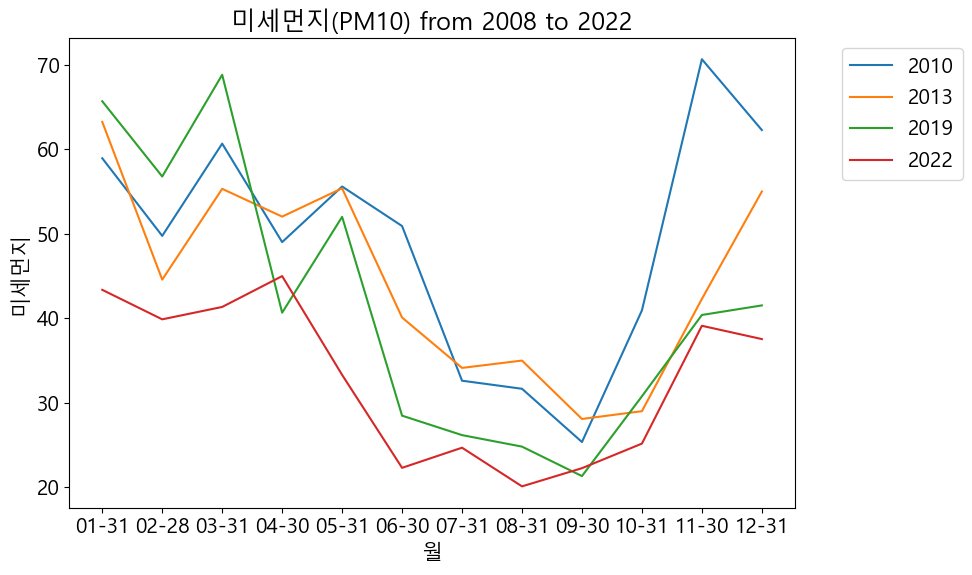

In [53]:
plt.figure(figsize=(10, 6))

# 2008년부터 2021년까지의 미세먼지(PM10) 데이터를 라인 플롯으로 중첩하여 그립니다.
for i in range(2008, 2023):
    if i%4 != 0 | i%3 == 0 :
        data = three_hourly_avg.loc[str(i)+'-01-31':str(i)+'-12-31', ['미세먼지(PM10)']]
        plt.plot(data.index.strftime('%m-%d'), data['미세먼지(PM10)'].values, label=str(i))
# for i in range(2008, 2013):
#     if i%4 != 0 :
#         data = three_hourly_avg.loc[str(i)+'-01-31':str(i)+'-12-31', ['미세먼지(PM10)']]
#         plt.plot(data.index.strftime('%m-%d'), data['미세먼지(PM10)'].values, label=str(i))

# 그래프에 제목을 추가합니다.
plt.title('미세먼지(PM10) from 2008 to 2022')

# x축과 y축에 라벨을 추가합니다.
plt.xlabel('월')
plt.ylabel('미세먼지')

# 범례를 추가합니다.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 # plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# 그래프를 표시합니다.
plt.tight_layout()
plt.show()

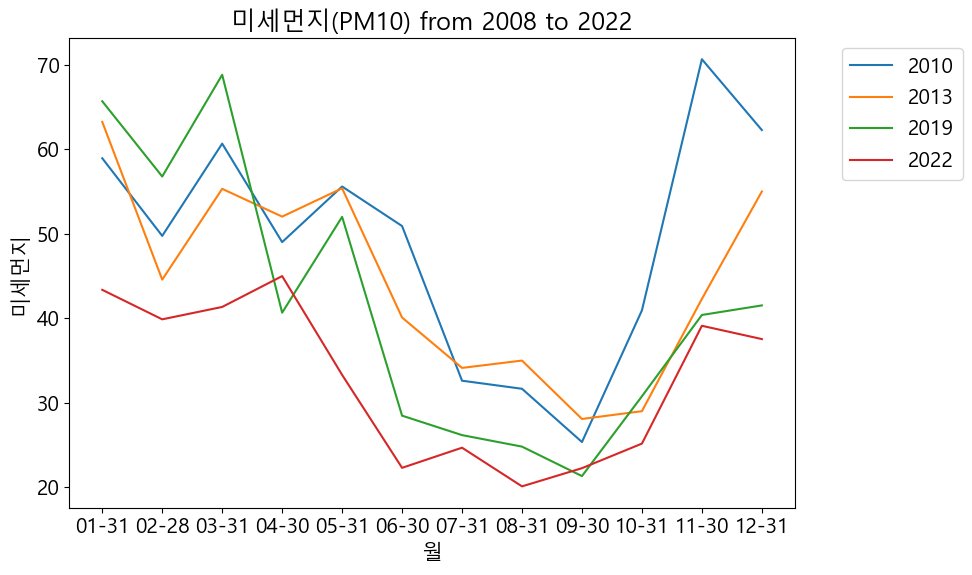

In [54]:
plt.figure(figsize=(10, 6))

# 2008년부터 2021년까지의 미세먼지(PM10) 데이터를 라인 플롯으로 중첩하여 그립니다.
for i in range(2008, 2023):
    if i%4 != 0 | i%3 == 0 :
        data = three_hourly_avg.loc[str(i)+'-01-31':str(i)+'-12-31', ['미세먼지(PM10)']]
        plt.plot(data.index.strftime('%m-%d'), data['미세먼지(PM10)'].values, label=str(i))
# for i in range(2008, 2013):
#     if i%4 != 0 :
#         data = three_hourly_avg.loc[str(i)+'-01-31':str(i)+'-12-31', ['미세먼지(PM10)']]
#         plt.plot(data.index.strftime('%m-%d'), data['미세먼지(PM10)'].values, label=str(i))

# 그래프에 제목을 추가합니다.
plt.title('미세먼지(PM10) from 2008 to 2022')

# x축과 y축에 라벨을 추가합니다.
plt.xlabel('월')
plt.ylabel('미세먼지')

# 범례를 추가합니다.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
 # plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# 그래프를 표시합니다.
plt.tight_layout()
plt.show()

### 기준 이상의 미세먼지 수치가 검측된 횟수 확인을 위한 그래프 작성
* 시간이 지날 수록 미세먼지의 양이 증가할 것으로 생각한 가설은 맞지 않았지만 과거의 비해 미세먼지에 영향이 큰건 분명 느껴지고 있어서 기준 수치 이상의 미세먼지가 발생한 횟수는 증가하였을 것이라고 생각하고 데이터 전처리

In [55]:
data=[]
for i in range(2008, 2023):
    data.append(three_hourly_avg.loc[str(i)+'-01-01':str(i)+'-12-31', ['미세먼지(PM10)']])

data

[            미세먼지(PM10)
 일시                    
 2008-01-31   60.911171
 2008-02-29   62.609195
 2008-03-31   70.224462
 2008-04-30   72.926389
 2008-05-31   60.973118
 2008-06-30   44.581944
 2008-07-31   41.548387
 2008-08-31   31.422043
 2008-09-30   41.723611
 2008-10-31   62.434140
 2008-11-30   49.523611
 2008-12-31   61.276882,
             미세먼지(PM10)
 일시                    
 2009-01-31   57.119624
 2009-02-28   80.638393
 2009-03-31   60.364247
 2009-04-30   66.112500
 2009-05-31   57.072581
 2009-06-30   50.558333
 2009-07-31   41.287634
 2009-08-31   31.086022
 2009-09-30   38.677778
 2009-10-31   51.487903
 2009-11-30   45.337500
 2009-12-31   70.405914,
             미세먼지(PM10)
 일시                    
 2010-01-31   58.955645
 2010-02-28   49.761905
 2010-03-31   60.689516
 2010-04-30   49.025000
 2010-05-31   55.611559
 2010-06-30   50.927778
 2010-07-31   32.608871
 2010-08-31   31.653226
 2010-09-30   25.345833
 2010-10-31   40.938172
 2010-11-30   70.684722
 2010-12-31   

In [56]:
filtered_df

,구분,미세먼지(PM10),초미세먼지
일시,,,
2008-01-01 01:00:00,평균,59.0,14.0
2008-01-01 02:00:00,평균,52.0,14.0
2008-01-01 03:00:00,평균,49.0,14.0
2008-01-01 04:00:00,평균,45.0,15.0
2008-01-01 05:00:00,평균,41.0,15.0
...,...,...,...
2022-12-31 19:00:00,평균,55.0,42.0
2022-12-31 20:00:00,평균,56.0,43.0
2022-12-31 21:00:00,평균,56.0,44.0


In [57]:
day_avg_df = filtered_df.drop(columns=['구분']).resample('d').mean()
day_avg_df

,미세먼지(PM10),초미세먼지
일시,,
2008-01-01,36.913043,13.173913
2008-01-02,35.708333,16.000000
2008-01-03,54.333333,25.625000
2008-01-04,84.583333,41.250000
2008-01-05,66.250000,29.916667
...,...,...
2022-12-27,49.208333,36.541667
2022-12-28,34.500000,21.250000
2022-12-29,30.291667,18.375000


In [75]:
filtered_df_200 = day_avg_df[day_avg_df['미세먼지(PM10)'] >= 100]
filtered_df_200

,미세먼지(PM10),초미세먼지
일시,,
2008-01-06,111.666667,56.083333
2008-01-07,188.791667,98.958333
2008-01-08,131.166667,63.416667
2008-02-12,156.458333,20.166667
2008-02-20,102.000000,46.208333
...,...,...
2021-11-20,138.416667,97.375000
2021-11-21,121.958333,90.750000
2022-01-09,116.375000,92.500000


In [76]:
# 연도별로 그룹화하고 미세먼지(PM10) 수치가 100 이상인 행의 개수를 계산
count_by_year = filtered_df_200.groupby(filtered_df_200.index.year).size()

# 결과 출력
print(count_by_year)

일시
2008    28
2009    26
2010    19
2011    16
2012     5
2013    15
2014    20
2015    10
2016     7
2017    10
2018    10
2019     9
2020     2
2021    10
2022     3
dtype: int64


In [77]:
# 연도별로 그룹화하고 미세먼지(PM10) 수치가 100 이상인 행의 개수를 계산
count_by_year = filtered_df_200.groupby(filtered_df_200.index.year).size()

# 결과 출력
print(count_by_year)

일시
2008    28
2009    26
2010    19
2011    16
2012     5
2013    15
2014    20
2015    10
2016     7
2017    10
2018    10
2019     9
2020     2
2021    10
2022     3
dtype: int64


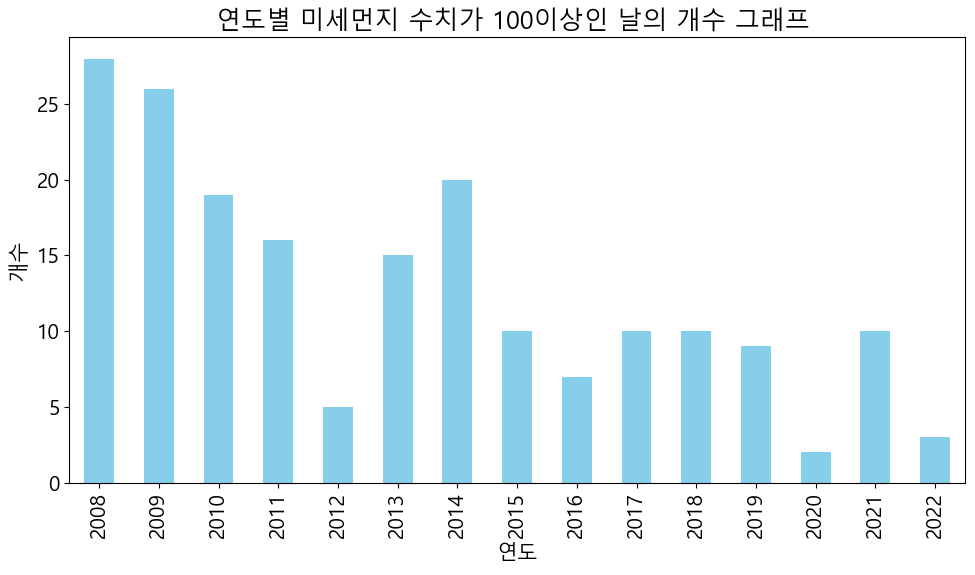

In [78]:
count_by_year = filtered_df_200.groupby(filtered_df_200.index.year).size()

# 막대 그래프를 생성합니다.
plt.figure(figsize=(10, 6))
count_by_year.plot(kind='bar', color='skyblue')

# 그래프 제목과 라벨을 추가합니다.
plt.title('연도별 미세먼지 수치가 100이상인 날의 개수 그래프 ')
plt.xlabel('연도')
plt.ylabel('개수')

# 그래프를 표시합니다.
plt.tight_layout()
plt.show()

In [62]:
filtered_df_50 = day_avg_df[day_avg_df['초미세먼지'] >= 80]

In [63]:
count_by_micro = filtered_df_50.groupby(filtered_df_50.index.year).size()
count_by_micro

일시
2008    5
2009    2
2010    6
2011    4
2013    3
2014    2
2017    1
2018    4
2019    8
2021    4
2022    1
dtype: int64

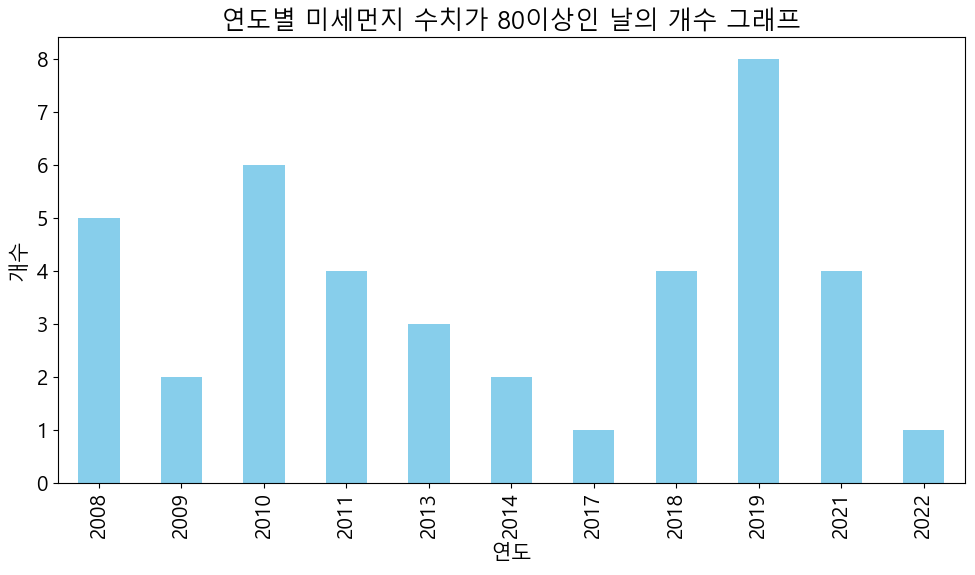

In [64]:
# 막대 그래프를 생성합니다.
plt.figure(figsize=(10, 6))
count_by_micro.plot(kind='bar', color='skyblue')

# 그래프 제목과 라벨을 추가합니다.
plt.title('연도별 미세먼지 수치가 80이상인 날의 개수 그래프')
plt.xlabel('연도')
plt.ylabel('개수')

# 그래프를 표시합니다.
plt.tight_layout()
plt.show()

In [65]:
filtered_df_50

,미세먼지(PM10),초미세먼지
일시,,
2008-01-07,188.791667,98.958333
2008-01-24,63.541667,82.000000
2008-01-26,64.958333,100.333333
2008-03-12,173.750000,93.458333
2008-10-17,154.458333,82.375000
2009-02-06,142.958333,80.291667
2009-11-28,138.125000,81.958333
2010-06-17,143.625000,93.833333
2010-06-18,128.833333,86.250000


# 결론

## 가설1 연도별로 미세먼지 농도는 꾸준히 높아졌을것이다.
 * 연도별 막대그래프로 확인을 해보니 08-17년까지는 상승주기는 보였으나 꾸준히 증가하는 형상은 아니었고 20년-22년은 코로나의 영향으로 총량이 낮아진걸 확인.
 * 연도별 그래프를 모아서 확인한 결과 시간이 지날수록 증가하는 모습은 보이지 않고 다른 영향이 있을것으로 확인됨
 * 대한민국 평균 습도그래프를 확인한 결과 역으로 유사한 모습을 보여 습도의 영향이 있다는 결론을 내림
 * 추가로 라니냐의 영향이 있을것으로 확인하였으나 데이터량이 적어 확정하기는 어려움
 * 연도별로 증가는 하지 않아도 기준치 이상의 수치가 높은 날은 더 많을것으로 예상하였으나 초미세먼지만 2019년에 조금 높은 수치를 보인것으로 시간이 지날수록 미세먼지 수치가 높아지지 않는것으로 확인함
## 가설2 봄에 미세먼지 농도가 가장 높을것이다.
 * 대체적으로 모든 그래프에서 봄이 높은 경향을 보였다.
## 가설3 자동차 교통량이 많아지는 시간대에 미세먼지가 상승할것이다.
 * 교통량이 가장 적은 시간과 많은 시간을 선정하여 지역별 미세먼지 수치와 비교를 해보았으나 관련이 크게 있어보이지않았고 교통량그래프를 확인해보았을때 3시와 7시의 차이를 제외하면 전체적인 교통량은 미세먼지의 영향을 줄 만큼 편차가 크지않았음.
   따라서 교통량보단 다른 환경적인 요인이 더 있을것으로 분석 